### Bishop’s University
Department of Computer Science
CS503– Data Visualization
Winter 2024 – Project

Objective: Comparative study of Dimensionality Reduction Techniques and their Impact on
Regression and Visualization.

Dataset:
1. The dataset is stored in a CSV file named 'diabetes2.csv', which has been provided to you.
2. The dataset consists of observations on 442 patients, with the response of interest being a
quantitative measure of disease progression one year after baseline. There are ten (10)
baseline input variables, age, sex, body-mass index, average blood pressure, and six blood
serum measurements. The last variable ‘Y’ is the output

Tasks:
1. Load the dataset from the CSV file into a DataFrame named diabetes_df using the Pandas
library.

In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
diabetes_df = pd.read_csv('C:/Users/Andrea/Desktop/2024 - WINTER PROJECTS/Data Visualization -Final project/Project-20240324/diabetes2.csv')

In [41]:
diabetes_df.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [42]:
diabetes_df.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


In [43]:
X = diabetes_df.drop('Y', axis = 1)
y = diabetes_df['Y']

In [44]:
X

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [45]:
y

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

In [46]:
diabetes_df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

2. Data Preprocessing:
a. Preprocess the diabetes_df by scaling all the variables to the range [0,1] using
MinMaxScaler.


b. Convert the scaled data back to a DataFrame named diabetes_df_s for easier
visualization.

In [47]:
#Scaling all the variables using MinMaxScaler

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled

array([[0.66666667, 1.        , 0.58264463, ..., 0.28208745, 0.562217  ,
        0.43939394],
       [0.48333333, 0.        , 0.14876033, ..., 0.14104372, 0.22243673,
        0.16666667],
       [0.88333333, 1.        , 0.51652893, ..., 0.28208745, 0.49657763,
        0.40909091],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.24964739, 0.30503001,
        0.56060606],
       [0.28333333, 0.        , 0.49586777, ..., 0.39351199, 0.65702552,
        0.40909091],
       [0.28333333, 0.        , 0.0661157 , ..., 0.14104372, 0.46930394,
        0.51515152]])

In [52]:
diabetes_df_s = pd.DataFrame(X_scaled, columns = X.columns)

In [53]:
diabetes_df_s

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333
...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091


3. Compute the variance of each input variable.

In [54]:
variances = X.var()

print("Variances of each variable:")
print(variances)

Variances of each variable:
AGE     171.846610
SEX       0.249561
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
dtype: float64


4. Plot the bar chart showing the variances computed in step 4.

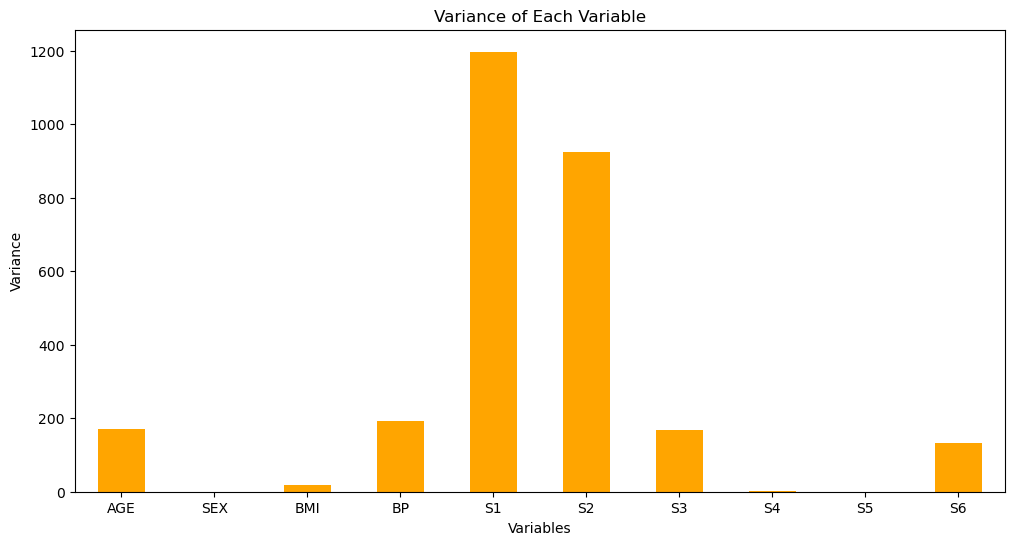

In [55]:
plt.figure(figsize=(12, 6))
variances.plot(kind='bar', color='orange')
plt.xlabel('Variables')
plt.ylabel('Variance')
plt.title('Variance of Each Variable')
plt.xticks(rotation=0)
plt.show()

5. Generate a heatmap to visualize the pair-wise correlation between the variables (input and
output variables).

In [56]:
#Warm colors indicate positive correlation whereas cool colors represents negative correlation

In [57]:
correlation_matrix = diabetes_df.corr()

In [58]:
correlation_matrix

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


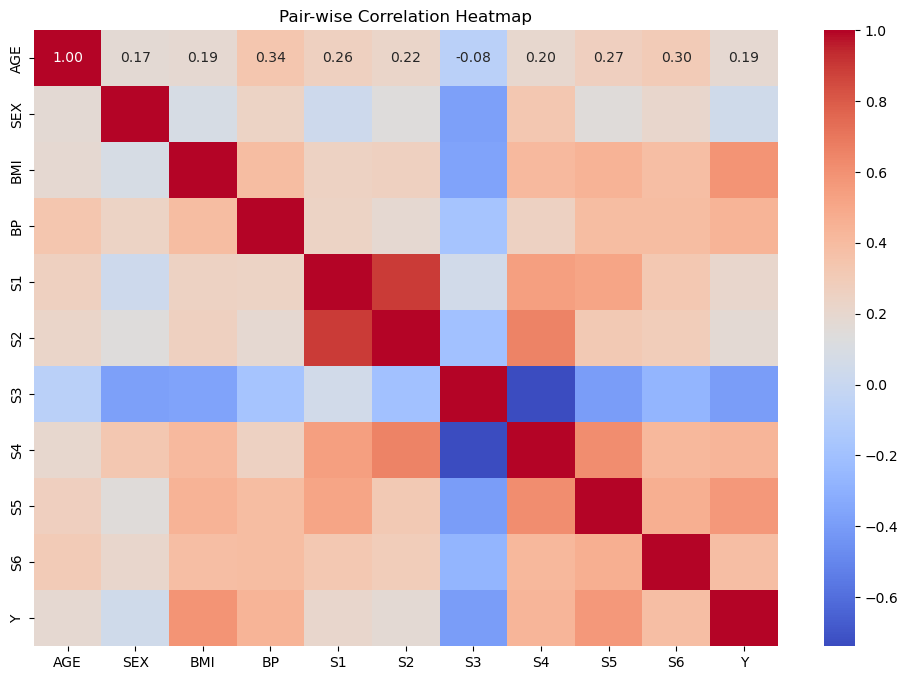

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pair-wise Correlation Heatmap')
plt.show()

6. Rank the input variables in descending order based on their correlation with the output
variable. The higher the variance, the more important the input variable is.

In [60]:
correlation_with_output = diabetes_df.corr()['Y'].drop('Y')


ranked_variables = correlation_with_output.abs().sort_values(ascending=False)


print("Ranked Input Variables Based on Correlation with Disease Progression which is our target variable:")
print(ranked_variables)

Ranked Input Variables Based on Correlation with Disease Progression which is our target variable:
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S3     0.394789
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
Name: Y, dtype: float64


7. Using the first two important input variables, generate a scatter to display the data
distribution

In [61]:
first_two_inputs = correlation_with_output.abs().nlargest(2).index
X_selected = diabetes_df[first_two_inputs]

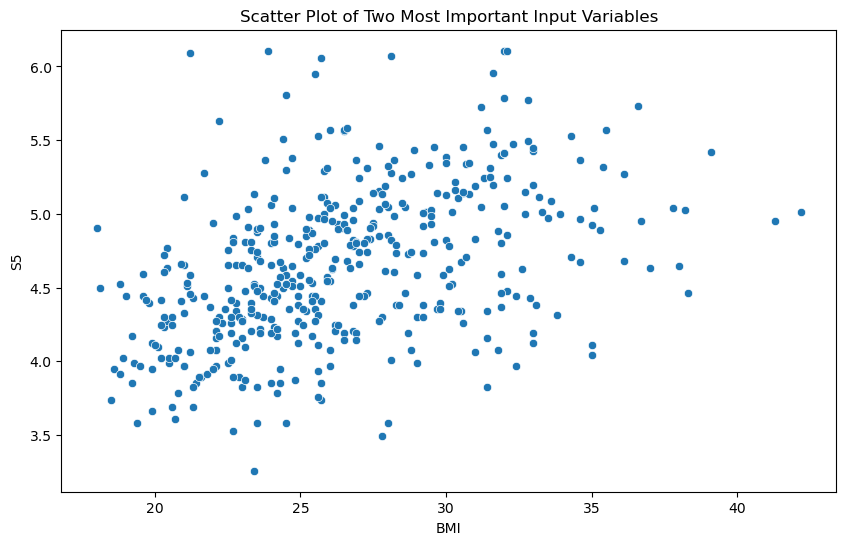

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=first_two_inputs[0], y=first_two_inputs[1], data=diabetes_df)
plt.title('Scatter Plot of Two Most Important Input Variables')
plt.xlabel(first_two_inputs[0])
plt.ylabel(first_two_inputs[1])
plt.show()

8. Apply Lasso regression to the entire dataset (using all variables).

a. Lasso regression involves a regularization parameter, denoted as alpha ∝ in the Scikit-
learn ML tool. A higher value of alpha (also known as lambda) leads to more
regularization, which in turn shrinks the coefficients towards zero, effectively reducing
the complexity of the model and selecting only the most important variables.

b. Using Mean Squared Error (MSE) to calculate the average squared difference between
the predicted and actual values. Lower MSE values indicate better model performance.
Scikit-learn provides a function for calculating MSE

c. Compute the MSE of Lasso regression for different values of alpha: 0, 1, 10, 100, 500,
and 1000.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = Lasso(alpha=0.1)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 2872.79, Test MSE: 2884.62


In [65]:
#Performing Lasso regression for different values of alpha 0,1,10,100.500.1000

In [66]:
#Performing Lasso Regression
lasso = Lasso(alpha=0)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 2868.55, Test MSE: 2900.19


/tmp/ipykernel_4144/3731695926.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [67]:
#Performing Lasso Regression
lasso = Lasso(alpha=1)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 2901.22, Test MSE: 2824.57


In [68]:
#Performing Lasso Regression
lasso = Lasso(alpha=10)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 3250.40, Test MSE: 2933.83


In [69]:
#Performing Lasso Regression
lasso = Lasso(alpha=100)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 6076.40, Test MSE: 5361.53


In [70]:
#Performing Lasso Regression
lasso = Lasso(alpha=500)  
lasso.fit(X_train_scaled, y_train)

train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 6076.40, Test MSE: 5361.53


In [71]:
#Performing Lasso Regression
lasso = Lasso(alpha=1000)  
lasso.fit(X_train_scaled, y_train)


train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")

Train MSE: 6076.40, Test MSE: 5361.53


d. Plot the curve showing the variation of MSE with respect to alpha

/tmp/ipykernel_4144/3867673695.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


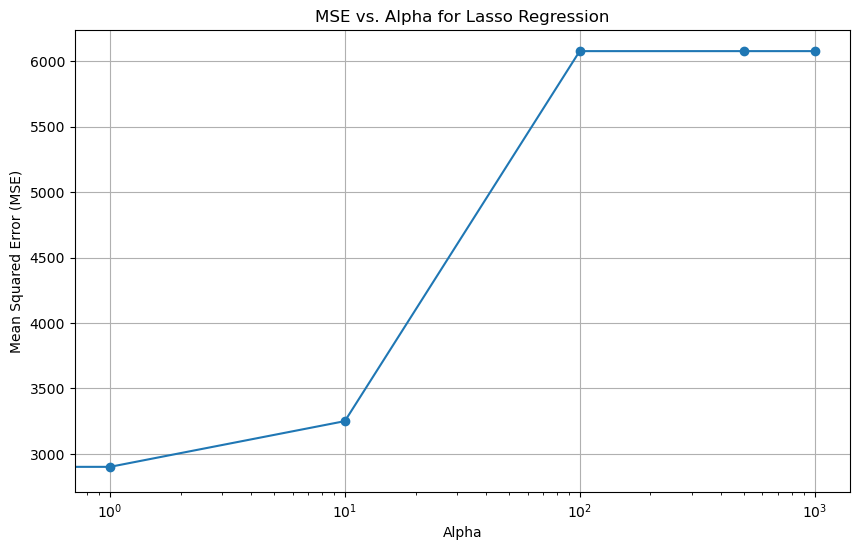

In [72]:
#Define alpha values
alpha_values = [0, 1, 10, 100, 500, 1000]
mse_values = []


for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
    mse_values.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Lasso Regression')
plt.xscale('log')
plt.grid(True)
plt.show()

e. Display the best MSE and the corresponding alpha value.


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Let us define the alpha values
alpha_values = [0, 1, 10, 100, 500, 1000]
mse_values = []


/tmp/ipykernel_4144/925968996.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.

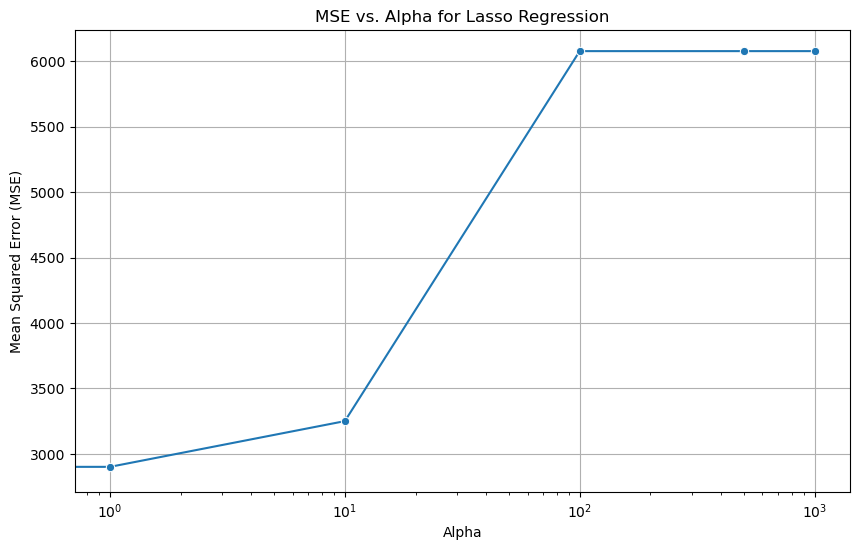

Best MSE: 2868.55 at Alpha: 0


In [75]:
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))
    mse_values.append(mse)

#Finding the best MSE value and the corresponding alpha value
best_mse_index = np.argmin(mse_values)
best_alpha = alpha_values[best_mse_index]
best_mse = mse_values[best_mse_index]

#Plotting the figure
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_values, y=mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Lasso Regression')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Best MSE: {best_mse:.2f} at Alpha: {best_alpha}")


f. Plot the evolution of Lasso coefficients against alpha to observe how they change and
how they are Shrunk as alpha varies.

/tmp/ipykernel_4144/2759027657.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


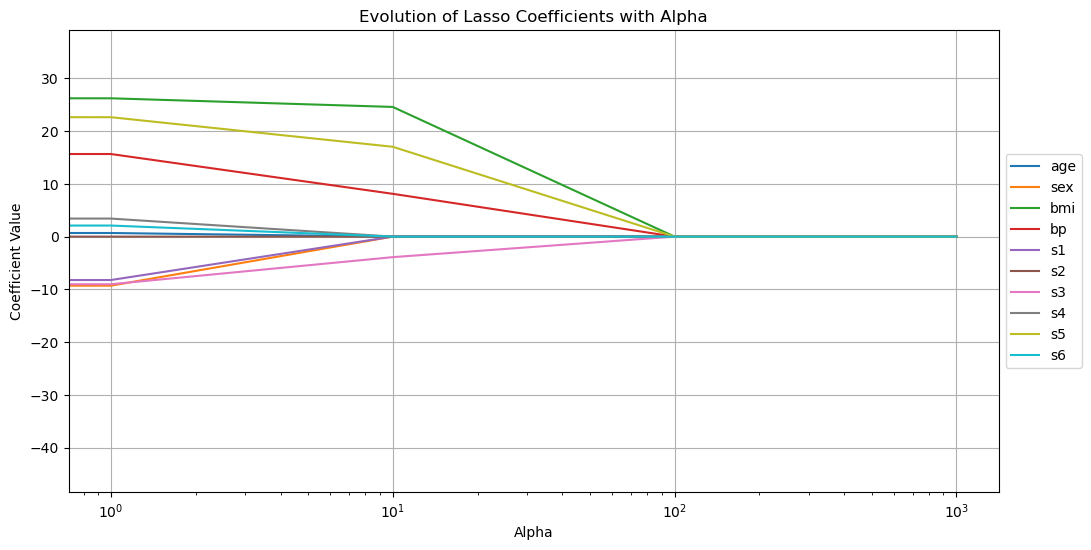

In [76]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y= diabetes.target



#Defining the alpha values
alpha_values = [0,1, 10, 100, 500, 1000]
coefficients = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    coefficients.append(lasso.coef_)


plt.figure(figsize=(12, 6))
plt.plot(alpha_values, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Evolution of Lasso Coefficients with Alpha')
plt.xscale('log')
plt.legend(diabetes.feature_names, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

9. Reduce the data dimensionality using PCA (Principal Component Analysis).

a. Utilize PC1 and PC2 and visualize the data scatter.

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
pca.fit(diabetes_df_s)

PCA(n_components=2)

In [80]:
x_pca = pca.transform(diabetes_df_s)

Text(0, 0.5, 'Second Principal Component')

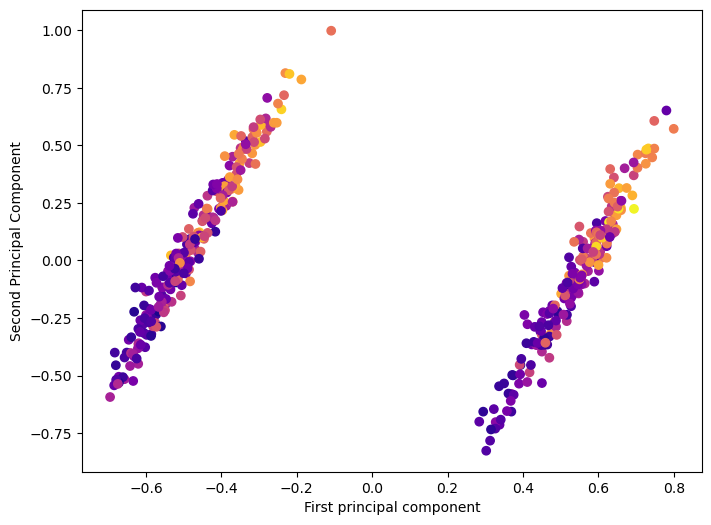

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [45]:
pca.components_

array([[ 0.11426802,  0.93596529,  0.07699134,  0.13276643,  0.05275149,
         0.07707611, -0.15679426,  0.17200271,  0.10835111,  0.1128026 ],
       [ 0.2874229 , -0.32229157,  0.33542306,  0.28222545,  0.36186745,
         0.28594091, -0.15656811,  0.36195417,  0.40435371,  0.2993657 ]])

In [51]:
df_comp = pd.DataFrame(pca.components_,columns=["AGE","SEX","BMI","BP","S1","S2","S3","S4","S5","S6"])

<AxesSubplot:>

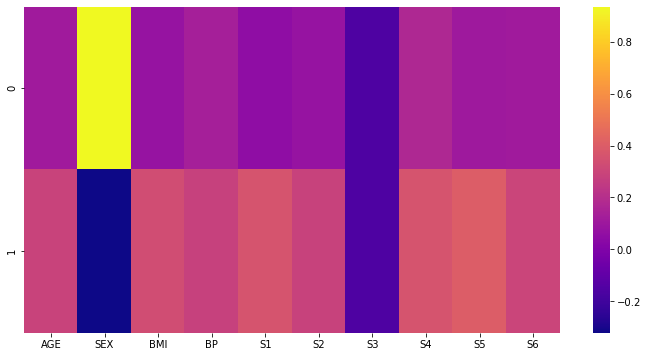

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

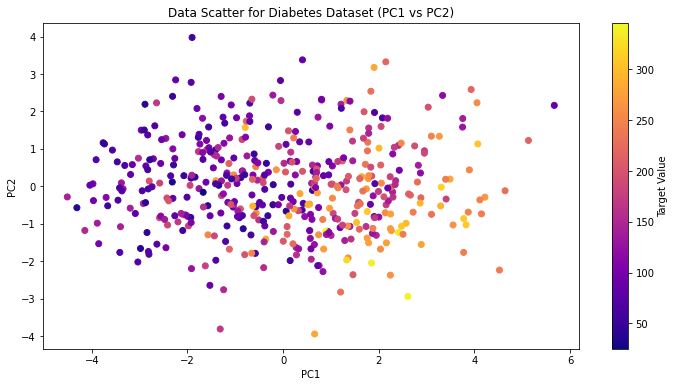

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

#Plotting the Data Scatter
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Scatter for Diabetes Dataset (PC1 vs PC2)')
plt.colorbar(label='Target Value')
plt.show()



b. Plot the loadings to examine how the variables contribute to PC1 and PC2.

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = diabetes_df.drop('Y', axis = 1)
y = diabetes_df['Y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X.shape[1])], index=diabetes.feature_names)

#Display the loadings for the first two PCs
print("Loadings for PC1 and PC2:")
print(loadings_df[['PC1', 'PC2']])


Loadings for PC1 and PC2:
          PC1       PC2
age  0.216431  0.044367
sex  0.186967 -0.386547
bmi  0.303162 -0.156281
bp   0.271738 -0.138266
s1   0.343255  0.573027
s2   0.351861  0.455942
s3  -0.282437  0.506239
s4   0.428834 -0.068181
s5   0.378618 -0.026187
s6   0.322183 -0.084949


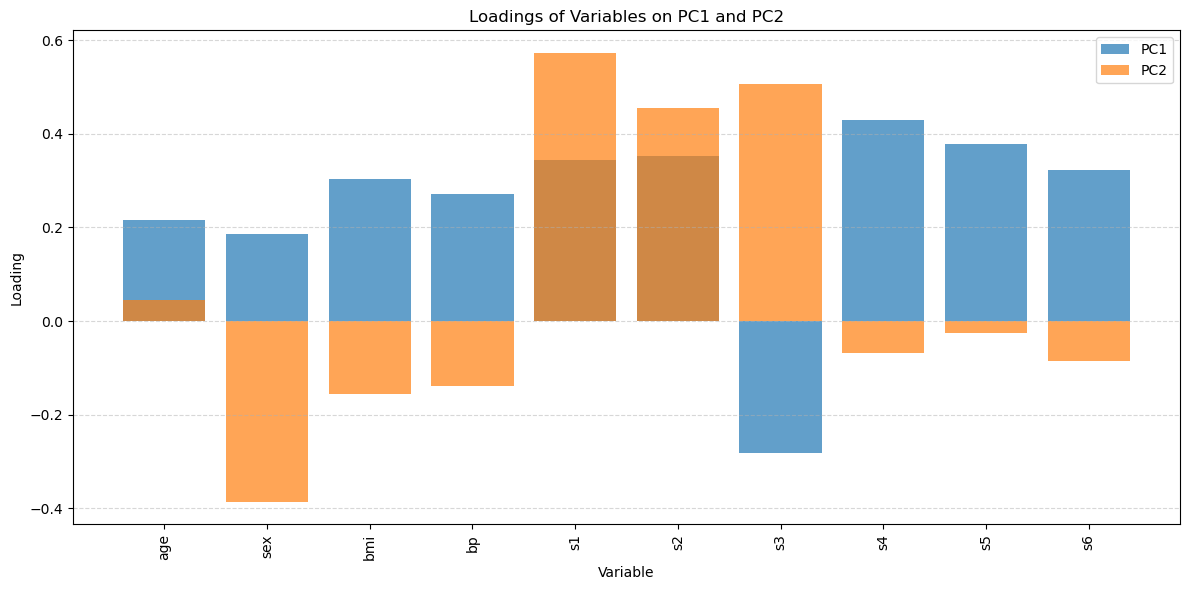

In [83]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y= diabetes.target




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X.shape[1])], index=diabetes.feature_names)


plt.figure(figsize=(12, 6))
plt.bar(range(len(loadings_df)), loadings_df['PC1'], label='PC1', alpha=0.7)
plt.bar(range(len(loadings_df)), loadings_df['PC2'], label='PC2', alpha=0.7)
plt.xticks(range(len(loadings_df)), diabetes.feature_names, rotation=90)
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('Loadings of Variables on PC1 and PC2')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

c. Perform normal linear regression, using PC1 only.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
pca = PCA(n_components=1)  
X_pca = pca.fit_transform(X_scaled)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [56]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = regression.predict(X_test)

In [58]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3581.90


d. Plot the regression line on the scatter.

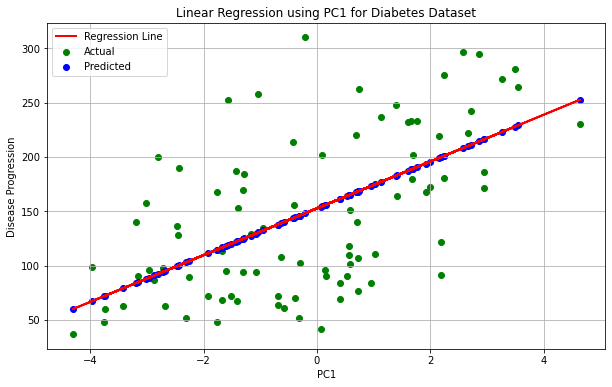

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('PC1')
plt.ylabel('Disease Progression')
plt.title('Linear Regression using PC1 for Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

e. Perform normal linear regression, using PC1 and PC2.

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


regression = LinearRegression()
regression.fit(X_train, y_train)



LinearRegression()

In [96]:
y_pred = regression.predict(X_test)



In [97]:
#Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 3534.24


f. Plot the regression hyper-line on the scatter.

g. Using bar chart, calculate, and display the MSE for both cases 9.c and 9.e.

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


mse_values = []

for n_components in [1, 2]:
   #Performing PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    regression = LinearRegression()
    regression.fit(X_train, y_train)

   
    y_pred = regression.predict(X_test)

    #Calculate the MSE 
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)



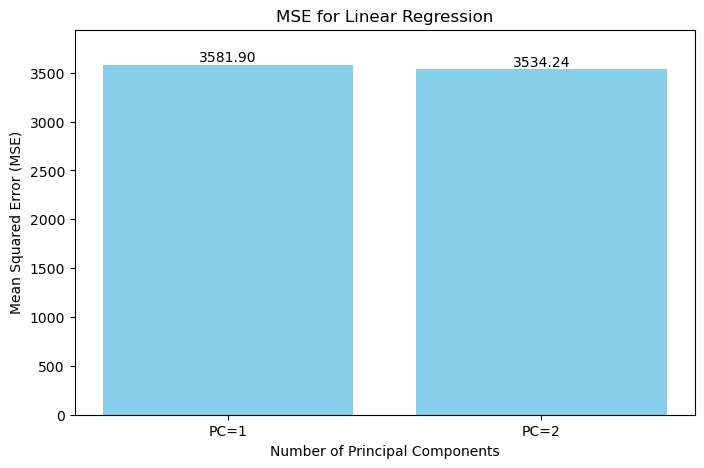

In [99]:
#Plotting MSE values using a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['PC=1', 'PC=2'], mse_values, color='skyblue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Linear Regression')
plt.ylim(0, max(mse_values) * 1.1)
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

10. Reduce the data dimensionality with t-SNE.

a. Utilize the 1st and 2nd t-SNE dimensions to visualize the data scatter, with different
perplexity values: 5, 10, 20, and 50.

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
#Performing T-SNE for the diabetes dataset
#Perplexity = 5
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

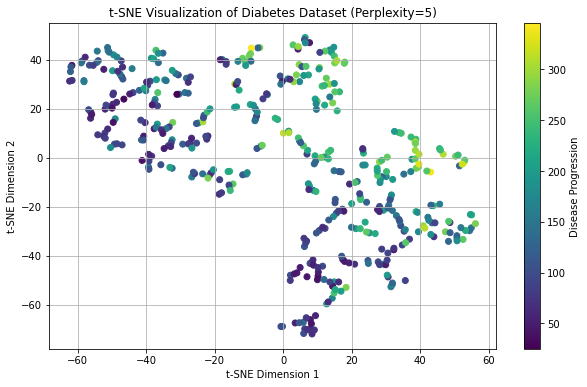

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Diabetes Dataset (Perplexity=5)')
plt.grid(True)
plt.show()

In [74]:
#Perplexity = 10
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

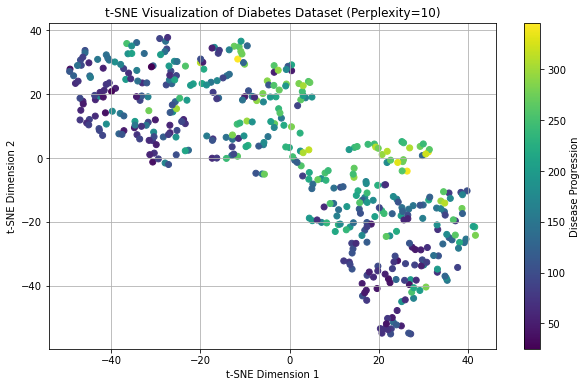

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Diabetes Dataset (Perplexity=10)')
plt.grid(True)
plt.show()

In [76]:
#Perplexity = 20
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

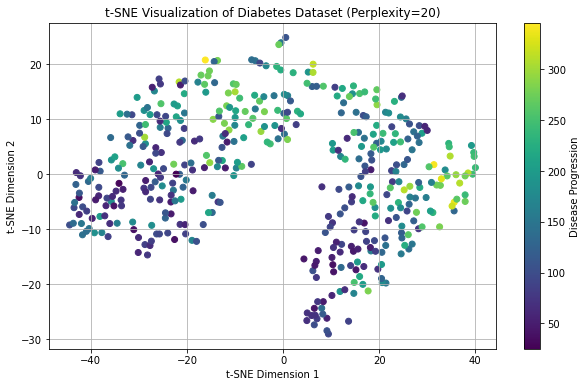

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Diabetes Dataset (Perplexity=20)')
plt.grid(True)
plt.show()

In [78]:
#Perplexity = 50
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

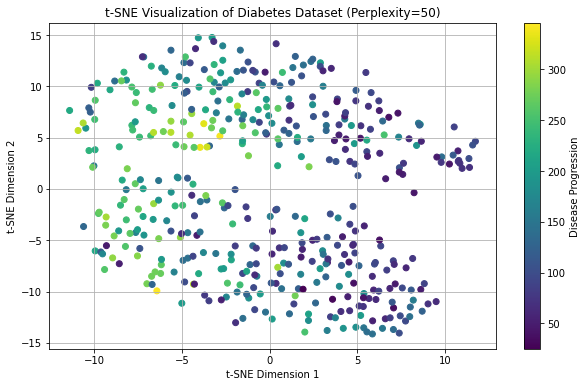

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Diabetes Dataset (Perplexity=50)')
plt.grid(True)
plt.show()

b. Perform normal linear regression, using only the 1st dimension of t-SNE.

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing t-SNE
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)



In [88]:
regression = LinearRegression()
regression.fit(X_train, y_train)


y_pred = regression.predict(X_test)

#Calculate the MSE
mse_1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_1:.2f}")

Mean Squared Error: 4633.91


c. Plot the regression line on the scatter

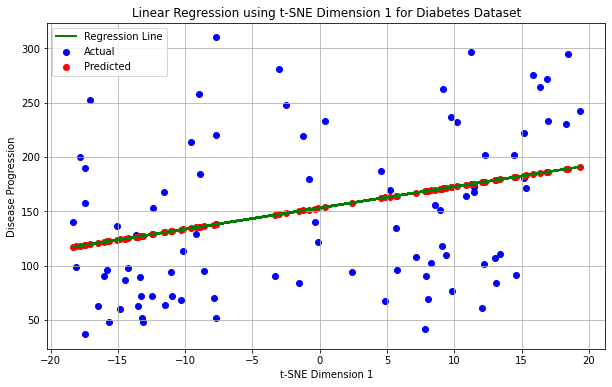

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, regression.predict(X_test), color='green', linewidth=2, label='Regression Line')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('Disease Progression')
plt.title('Linear Regression using t-SNE Dimension 1 for Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

d. Perform normal linear regression, using the 1st and 2nd dimensions of t-SNE.

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)



In [92]:
regression = LinearRegression()
regression.fit(X_train, y_train)


y_pred = regression.predict(X_test)

#Calculate the MSE
mse_2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_2:.2f}")

Mean Squared Error: 4379.15


e. Plot the regression hyper-line on the scatter.

f. Using bar chart, calculate, and display the MSE for both cases 10.b and 10.d.

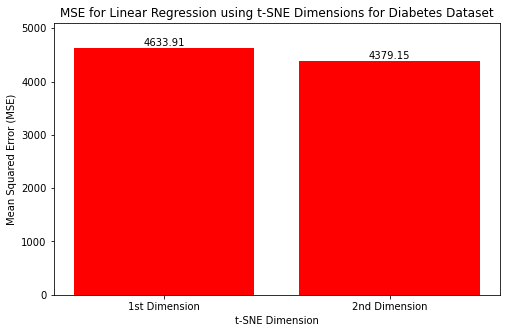

In [94]:
plt.figure(figsize=(8, 5))
plt.bar(['1st Dimension', '2nd Dimension'], [mse_1, mse_2], color='red')
plt.xlabel('t-SNE Dimension')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Linear Regression using t-SNE Dimensions for Diabetes Dataset')
plt.ylim(0, max(mse_1, mse_2) * 1.1)
for i, v in enumerate([mse_1, mse_2]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

1. Reduce the data dimensionality with UMAP.

a. Utilize the 1st and 2nd UMAP dimensions to visualize the data scatter, with different
n_neighbors (number of neighbors) values: 5, 10, 20, and 50.

In [97]:
import matplotlib.pyplot as plt
import umap

C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


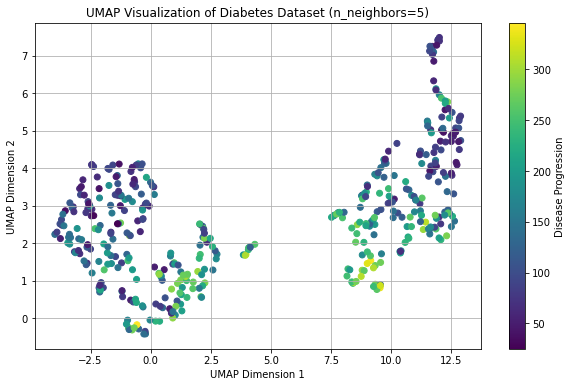

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing UMAP
umap_model = umap.UMAP(n_neighbors=5, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Diabetes Dataset (n_neighbors=5)')
plt.grid(True)
plt.show()

C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


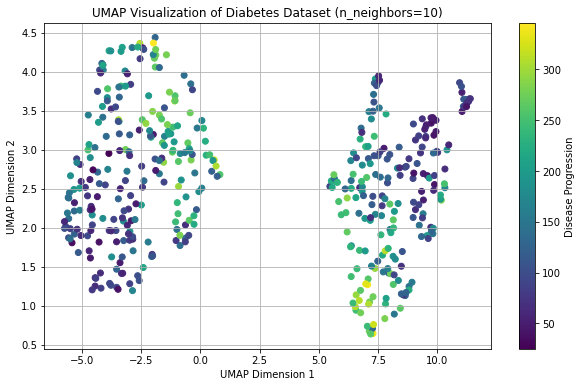

In [99]:
#Performing UMAP
umap_model = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Diabetes Dataset (n_neighbors=10)')
plt.grid(True)
plt.show()

C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


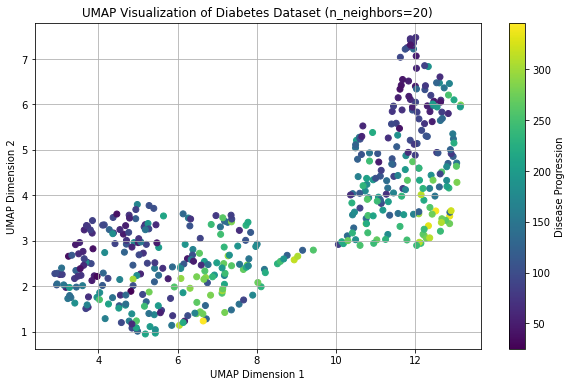

In [100]:
#Performing UMAP
umap_model = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Diabetes Dataset (n_neighbors=20)')
plt.grid(True)
plt.show()

C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


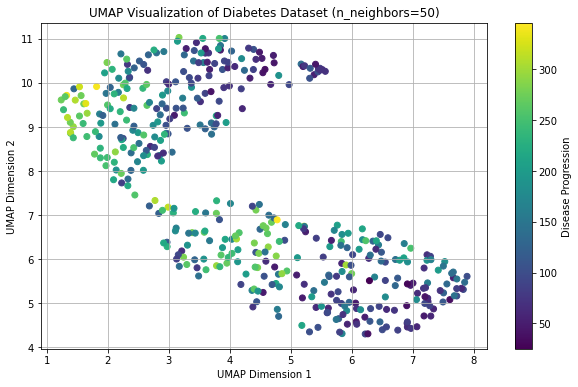

In [101]:
#Performing UMAP
umap_model = umap.UMAP(n_neighbors=50, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Disease Progression')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Diabetes Dataset (n_neighbors=50)')
plt.grid(True)
plt.show()

b. Perform normal linear regression, using only the 1st dimension of UMAP.

In [109]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import umap

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

#Performing UMAP
umap_emb = umap.UMAP(n_components=1).fit_transform(X)


umap_dim1 = umap_emb[:, 0]

X_train, X_test, y_train, y_test = train_test_split(umap_dim1, y, test_size=0.2, random_state=42)


X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)



In [110]:
reg = LinearRegression().fit(X_train, y_train)


y_pred = reg.predict(X_test)

#Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 4971.614113443301


c. Plot the regression line on the scatter.


d. Perform normal linear regression, using the 1st and 2nd dimensions of UMAP.


In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)


C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [112]:
regression = LinearRegression()
regression.fit(X_train, y_train)


y_pred = regression.predict(X_test)

#Calculate the MSE
mse_u2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_u2:.2f}")

Mean Squared Error: 3812.47


e. Plot the regression hyper-line on the scatter.


f. Using bar chart, calculate, and display the MSE for both cases 11.b and 11.d.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing UMAP
umap_model_1d = umap.UMAP(n_components=1, random_state=42)
X_umap_1d = umap_model_1d.fit_transform(X_scaled)

#Performing UMAP
umap_model_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_model_2d.fit_transform(X_scaled)


X_train_1d, X_test_1d, y_train, y_test = train_test_split(X_umap_1d, y, test_size=0.2, random_state=42)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_umap_2d, y, test_size=0.2, random_state=42)

regression_1d = LinearRegression()
regression_1d.fit(X_train_1d, y_train)
y_pred_1d = regression_1d.predict(X_test_1d)
mse_1d = mean_squared_error(y_test, y_pred_1d)

regression_2d = LinearRegression()
regression_2d.fit(X_train_2d, y_train)
y_pred_2d = regression_2d.predict(X_test_2d)
mse_2d = mean_squared_error(y_test, y_pred_2d)


C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


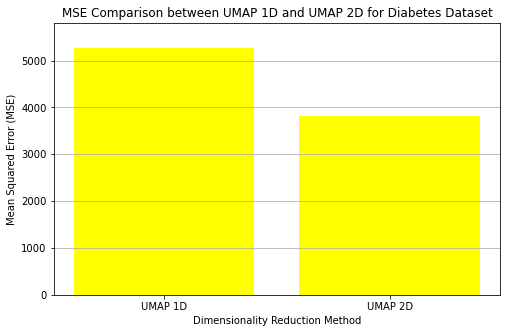

In [115]:
#Displaying the MSE values as a bar chart
labels = ['UMAP 1D', 'UMAP 2D']
mse_values = [mse_1d, mse_2d]

plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color='yellow')
plt.xlabel('Dimensionality Reduction Method')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison between UMAP 1D and UMAP 2D for Diabetes Dataset')
plt.ylim(0, max(mse_values) * 1.1)
plt.grid(axis='y')
plt.show()

g. Provide a comparative table to compare Linear Regression applied to PCA, t-SNE, and
UMAP data, utilizing the first three dimensions for each dimensionality reduction
method.

In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



X = diabetes_df.drop('Y', axis = 1)
y = diabetes_df['Y']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Performing PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#Performing t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#Performing UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)




C:\Users\Andrea\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train a Linear Regression model using PCA
regression_pca = LinearRegression()
regression_pca.fit(X_pca, y)

#Train a Linear Regression model using t-SNE
regression_tsne = LinearRegression()
regression_tsne.fit(X_tsne, y)

#Train a Linear Regression model using UMAP
regression_umap = LinearRegression()
regression_umap.fit(X_umap, y)

#To make predictions
y_pred_pca = regression_pca.predict(X_pca)
y_pred_tsne = regression_tsne.predict(X_tsne)
y_pred_umap = regression_umap.predict(X_umap)

#Calculate the MSE
mse_pca = mean_squared_error(y, y_pred_pca)
mse_tsne = mean_squared_error(y, y_pred_tsne)
mse_umap = mean_squared_error(y, y_pred_umap)

#Creating a comparative table
data = {
    'Method': ['PCA', 't-SNE', 'UMAP'],
    'MSE': [mse_pca, mse_tsne, mse_umap]
}
df = pd.DataFrame(data)
print(df)

  Method          MSE
0    PCA  3723.548292
1  t-SNE  4163.661741
2   UMAP  3612.091690
